# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ../python

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')


# select this option to load version 2 (with 20 agents) of the environment
##env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

##agent=Agent(state_size=state_size, action_size=action_size, random_seed=10)

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque


Episode 1	Average Score Last 100: 0.08	Score: 0.08	Overall Average: 0.08
Episode 2	Average Score Last 100: 0.52	Score: 0.96	Overall Average: 0.52
Episode 3	Average Score Last 100: 0.78	Score: 1.29	Overall Average: 0.78
Episode 4	Average Score Last 100: 0.71	Score: 0.51	Overall Average: 0.71
Episode 5	Average Score Last 100: 0.57	Score: 0.00	Overall Average: 0.57
Episode 6	Average Score Last 100: 0.47	Score: 0.00	Overall Average: 0.47
Episode 7	Average Score Last 100: 0.45	Score: 0.28	Overall Average: 0.45
Episode 8	Average Score Last 100: 0.42	Score: 0.28	Overall Average: 0.42
Episode 9	Average Score Last 100: 0.51	Score: 1.15	Overall Average: 0.51
Episode 10	Average Score Last 100: 0.46	Score: 0.06	Overall Average: 0.46
Episode 11	Average Score Last 100: 0.46	Score: 0.47	Overall Average: 0.46
Episode 12	Average Score Last 100: 0.62	Score: 2.41	Overall Average: 0.62
Episode 13	Average Score Last 100: 0.68	Score: 1.35	Overall Average: 0.68
Episode 14	Average Score Last 100: 0.64	Score: 

Episode 219	Average Score Last 100: 10.15	Score: 10.86	Overall Average: 6.50
Episode 220	Average Score Last 100: 10.21	Score: 10.78	Overall Average: 6.52
Episode 221	Average Score Last 100: 10.22	Score: 8.61	Overall Average: 6.53
Episode 222	Average Score Last 100: 10.29	Score: 12.70	Overall Average: 6.56
Episode 223	Average Score Last 100: 10.32	Score: 9.17	Overall Average: 6.57
Episode 224	Average Score Last 100: 10.35	Score: 10.91	Overall Average: 6.59
Episode 225	Average Score Last 100: 10.39	Score: 11.61	Overall Average: 6.61
Episode 226	Average Score Last 100: 10.39	Score: 11.15	Overall Average: 6.63
Episode 227	Average Score Last 100: 10.44	Score: 8.21	Overall Average: 6.64
Episode 228	Average Score Last 100: 10.52	Score: 14.47	Overall Average: 6.67
Episode 229	Average Score Last 100: 10.53	Score: 8.69	Overall Average: 6.68
Episode 230	Average Score Last 100: 10.53	Score: 7.66	Overall Average: 6.68
Episode 231	Average Score Last 100: 10.59	Score: 13.11	Overall Average: 6.71
Epis

Episode 326	Average Score Last 100: 11.74	Score: 10.63	Overall Average: 8.20
Episode 327	Average Score Last 100: 11.76	Score: 10.71	Overall Average: 8.20
Episode 328	Average Score Last 100: 11.72	Score: 10.04	Overall Average: 8.21
Episode 329	Average Score Last 100: 11.71	Score: 8.20	Overall Average: 8.21
Episode 330	Average Score Last 100: 11.73	Score: 9.33	Overall Average: 8.21
Episode 331	Average Score Last 100: 11.68	Score: 8.58	Overall Average: 8.21
Episode 332	Average Score Last 100: 11.82	Score: 13.51	Overall Average: 8.23
Episode 333	Average Score Last 100: 11.82	Score: 13.43	Overall Average: 8.25
Episode 334	Average Score Last 100: 11.81	Score: 12.80	Overall Average: 8.26
Episode 335	Average Score Last 100: 11.80	Score: 8.45	Overall Average: 8.26
Episode 336	Average Score Last 100: 11.85	Score: 16.48	Overall Average: 8.28
Episode 337	Average Score Last 100: 11.88	Score: 12.63	Overall Average: 8.30
Episode 338	Average Score Last 100: 11.88	Score: 13.41	Overall Average: 8.31
Epi

Episode 537	Average Score Last 100: 15.09	Score: 22.49	Overall Average: 10.58
Episode 538	Average Score Last 100: 15.20	Score: 20.70	Overall Average: 10.60
Episode 539	Average Score Last 100: 15.26	Score: 19.22	Overall Average: 10.62
Episode 540	Average Score Last 100: 15.32	Score: 17.01	Overall Average: 10.63
Episode 541	Average Score Last 100: 15.38	Score: 21.71	Overall Average: 10.65
Episode 542	Average Score Last 100: 15.39	Score: 16.21	Overall Average: 10.66
Episode 543	Average Score Last 100: 15.44	Score: 21.80	Overall Average: 10.68
Episode 544	Average Score Last 100: 15.61	Score: 32.49	Overall Average: 10.72
Episode 545	Average Score Last 100: 15.66	Score: 16.32	Overall Average: 10.73
Episode 546	Average Score Last 100: 15.61	Score: 15.51	Overall Average: 10.74
Episode 547	Average Score Last 100: 15.59	Score: 18.70	Overall Average: 10.76
Episode 548	Average Score Last 100: 15.65	Score: 19.33	Overall Average: 10.77
Episode 549	Average Score Last 100: 15.71	Score: 18.45	Overall A

Episode 642	Average Score Last 100: 18.33	Score: 18.57	Overall Average: 11.86
Episode 643	Average Score Last 100: 18.33	Score: 22.26	Overall Average: 11.87
Episode 644	Average Score Last 100: 18.29	Score: 27.80	Overall Average: 11.90
Episode 645	Average Score Last 100: 18.33	Score: 20.84	Overall Average: 11.91
Episode 646	Average Score Last 100: 18.34	Score: 16.68	Overall Average: 11.92
Episode 647	Average Score Last 100: 18.37	Score: 20.96	Overall Average: 11.93
Episode 648	Average Score Last 100: 18.37	Score: 20.01	Overall Average: 11.94
Episode 649	Average Score Last 100: 18.43	Score: 24.46	Overall Average: 11.96
Episode 650	Average Score Last 100: 18.48	Score: 23.95	Overall Average: 11.98
Episode 651	Average Score Last 100: 18.53	Score: 24.63	Overall Average: 12.00
Episode 652	Average Score Last 100: 18.51	Score: 17.24	Overall Average: 12.01
Episode 653	Average Score Last 100: 18.56	Score: 19.01	Overall Average: 12.02
Episode 654	Average Score Last 100: 18.61	Score: 21.66	Overall A

Episode 747	Average Score Last 100: 20.17	Score: 16.20	Overall Average: 13.03
Episode 748	Average Score Last 100: 20.17	Score: 20.47	Overall Average: 13.04
Episode 749	Average Score Last 100: 20.11	Score: 18.64	Overall Average: 13.05
Episode 750	Average Score Last 100: 20.04	Score: 15.97	Overall Average: 13.06
Episode 751	Average Score Last 100: 20.00	Score: 21.01	Overall Average: 13.07
Episode 752	Average Score Last 100: 20.04	Score: 21.58	Overall Average: 13.08
Episode 753	Average Score Last 100: 20.08	Score: 22.74	Overall Average: 13.09
Episode 754	Average Score Last 100: 20.10	Score: 23.31	Overall Average: 13.10
Episode 755	Average Score Last 100: 20.18	Score: 26.42	Overall Average: 13.12
Episode 756	Average Score Last 100: 20.21	Score: 21.84	Overall Average: 13.13
Episode 757	Average Score Last 100: 20.31	Score: 30.10	Overall Average: 13.16
Episode 758	Average Score Last 100: 20.31	Score: 21.13	Overall Average: 13.17
Episode 759	Average Score Last 100: 20.34	Score: 24.73	Overall A

Episode 852	Average Score Last 100: 22.05	Score: 20.75	Overall Average: 14.13
Episode 853	Average Score Last 100: 21.95	Score: 12.67	Overall Average: 14.13
Episode 854	Average Score Last 100: 21.96	Score: 24.86	Overall Average: 14.14
Episode 855	Average Score Last 100: 21.86	Score: 15.59	Overall Average: 14.14
Episode 856	Average Score Last 100: 21.92	Score: 28.12	Overall Average: 14.16
Episode 857	Average Score Last 100: 21.94	Score: 31.74	Overall Average: 14.18
Episode 858	Average Score Last 100: 21.97	Score: 24.88	Overall Average: 14.19
Episode 859	Average Score Last 100: 21.93	Score: 20.28	Overall Average: 14.20
Episode 860	Average Score Last 100: 22.00	Score: 23.10	Overall Average: 14.21
Episode 861	Average Score Last 100: 22.02	Score: 19.76	Overall Average: 14.22
Episode 862	Average Score Last 100: 22.10	Score: 25.48	Overall Average: 14.23
Episode 863	Average Score Last 100: 22.06	Score: 19.55	Overall Average: 14.24
Episode 864	Average Score Last 100: 22.06	Score: 23.40	Overall A

Episode 957	Average Score Last 100: 24.01	Score: 35.61	Overall Average: 15.21
Episode 958	Average Score Last 100: 23.98	Score: 21.23	Overall Average: 15.21
Episode 959	Average Score Last 100: 24.05	Score: 27.92	Overall Average: 15.23
Episode 960	Average Score Last 100: 24.08	Score: 25.83	Overall Average: 15.24
Episode 961	Average Score Last 100: 24.21	Score: 32.77	Overall Average: 15.26
Episode 962	Average Score Last 100: 24.23	Score: 26.90	Overall Average: 15.27
Episode 963	Average Score Last 100: 24.30	Score: 27.04	Overall Average: 15.28
Episode 964	Average Score Last 100: 24.23	Score: 16.27	Overall Average: 15.28
Episode 965	Average Score Last 100: 24.30	Score: 26.46	Overall Average: 15.29
Episode 966	Average Score Last 100: 24.30	Score: 24.99	Overall Average: 15.30
Episode 967	Average Score Last 100: 24.41	Score: 31.19	Overall Average: 15.32
Episode 968	Average Score Last 100: 24.47	Score: 29.27	Overall Average: 15.33
Episode 969	Average Score Last 100: 24.52	Score: 26.00	Overall A

Episode 1061	Average Score Last 100: 25.71	Score: 27.91	Overall Average: 16.24
Episode 1062	Average Score Last 100: 25.67	Score: 23.64	Overall Average: 16.25
Episode 1063	Average Score Last 100: 25.72	Score: 31.38	Overall Average: 16.26
Episode 1064	Average Score Last 100: 25.83	Score: 27.25	Overall Average: 16.27
Episode 1065	Average Score Last 100: 25.84	Score: 28.00	Overall Average: 16.28
Episode 1066	Average Score Last 100: 25.89	Score: 29.31	Overall Average: 16.30
Episode 1067	Average Score Last 100: 25.88	Score: 30.70	Overall Average: 16.31
Episode 1068	Average Score Last 100: 25.86	Score: 27.27	Overall Average: 16.32
Episode 1069	Average Score Last 100: 25.93	Score: 32.80	Overall Average: 16.34
Episode 1070	Average Score Last 100: 25.99	Score: 28.59	Overall Average: 16.35
Episode 1071	Average Score Last 100: 26.02	Score: 27.93	Overall Average: 16.36
Episode 1072	Average Score Last 100: 25.94	Score: 21.12	Overall Average: 16.36
Episode 1073	Average Score Last 100: 25.91	Score: 22

Episode 1267	Average Score Last 100: 28.53	Score: 29.17	Overall Average: 18.17
Episode 1268	Average Score Last 100: 28.54	Score: 28.21	Overall Average: 18.17
Episode 1269	Average Score Last 100: 28.61	Score: 34.26	Overall Average: 18.19
Episode 1270	Average Score Last 100: 28.66	Score: 29.01	Overall Average: 18.19
Episode 1271	Average Score Last 100: 28.69	Score: 30.47	Overall Average: 18.20
Episode 1272	Average Score Last 100: 28.74	Score: 29.33	Overall Average: 18.21
Episode 1273	Average Score Last 100: 28.82	Score: 36.26	Overall Average: 18.23
Episode 1274	Average Score Last 100: 28.92	Score: 33.54	Overall Average: 18.24
Episode 1275	Average Score Last 100: 29.01	Score: 29.66	Overall Average: 18.25
Episode 1276	Average Score Last 100: 29.05	Score: 26.81	Overall Average: 18.25
Episode 1277	Average Score Last 100: 29.07	Score: 23.20	Overall Average: 18.26
Episode 1278	Average Score Last 100: 29.09	Score: 32.83	Overall Average: 18.27
Episode 1279	Average Score Last 100: 29.13	Score: 31

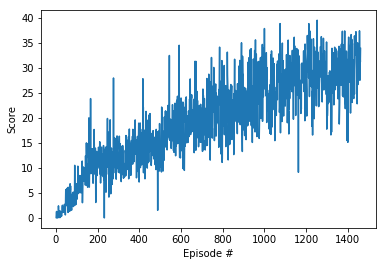

In [7]:
##CHANGING MAX T to 1000
def ddpg(n_episodes=2500, max_t=1000):
    agents = []
    
    scores_deque = deque(maxlen=100)
    ##NOT SURE I NEED THE LINE BELOW AS I ALSO RESET IT LATER, BUT LEAVING IT FOR NOW
    scores=np.zeros(num_agents)
    scores_eps = []
    
    for a in range(num_agents):
        agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=0))
    
    for i_episode in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        
        for agent in agents:
            agent.reset()
        
        for t in range(max_t):
            actions = np.array([agents[a].act(states[a]) for a in range(num_agents)])
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done
            
            for a in range(num_agents):
                agents[a].step(t,states[a],actions[a],rewards[a],next_states[a], dones[a])
            
            states = next_states
            scores += rewards
                              
            if t % 100 == 0:
                print('\rTimestep {}\tScore: {:.2f}'.format(t,np.mean(scores)), end = "")
            if np.any(dones):
                break
        score=np.mean(scores)
        scores_deque.append(score)
        scores_eps.append(score)
        avg_deque=np.mean(scores_deque)
        avg_score=np.mean(scores_eps)
        
        print('\rEpisode {}\tAverage Score Last 100: {:.2f}\tScore: {:.2f}\tOverall Average: {:.2f}'.format(i_episode,avg_deque,score,avg_score),end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            
        if avg_deque >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100,avg_deque))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_eps

scores=ddpg()

fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 